# 1. Formatting

## 1.1 Imports

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go

# INPUT SIMULATION NAME

In [34]:
sim_name = "17"

## 1.2 Read Data

In [35]:
df = pd.read_csv(f"C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\{sim_name}.csv")

# df = pd.read_csv(f"/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/{sim_name}.csv")

# columns_of_interest = [
#     'Catastrophe Point Index', 
#     'Speculator Proportion at CUSP', 'Market Price at CUSP', 'Excess Demand', 
#     'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
#     'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
#     'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
# ]

columns_of_interest = [
    "Speculator Proportion at CUSP", "Market Price at CUSP", "Excess Demand", 
    "Kurtosis MP", "Kurtosis ED", 
    "MP Volatility Last 100 Trades", "MP Volatility Last 10 Trades", 
    "Overall Sim Volatility",
    "Last 100 Pre-CUSP Market Prices Difference"
]


# df['Speculator Proportion at CUSP'] = df['Speculator Proportion at CUSP'].str.rstrip('%').astype('float') / 100
df['Speculator Proportion at CUSP'] = df['Speculator Proportion at CUSP'].str.rstrip('%').astype('float')
df = df[df['Catastrophe Point Found?'] == True]

# 1. Understanding the Data

## TABLE 13 - 1.1 Table Summary

In [36]:
df_1 = df.copy()

cols_1 = [
    "Speculator Proportion at CUSP", "Market Price at CUSP", "Excess Demand", 
    "Overall Sim Volatility"
]

cols_2 = ["Kurtosis MP", "Kurtosis ED",
         "MP Volatility Last 100 Trades", "MP Volatility Last 10 Trades",
          "Last 100 Pre-CUSP Market Prices Difference"]

df_1 = df_1[columns_of_interest]
df_1.describe()
# df_tb1 = df_1[cols_1]
# df_tb1.describe()

# df_tb2 = df_1[cols_2]
# df_tb2.describe()

,Speculator Proportion at CUSP,Market Price at CUSP,Excess Demand,Kurtosis MP,Kurtosis ED,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Last 100 Pre-CUSP Market Prices Difference
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,765.000000,944.000000,944.000000
mean,64.974661,71.759110,-412.342161,-0.187195,-0.838400,1.194526,0.786344,6.355439,14.535434
std,0.139499,14.239439,168.373110,0.538620,0.774893,2.122711,1.852208,0.393715,6.367103
min,64.560000,52.550000,-1397.000000,-1.452790,-1.760850,0.479000,0.000000,5.209000,0.350000
25%,64.880000,58.500000,-507.250000,-0.532927,-1.298080,0.516000,0.548000,6.082750,9.800000
50%,64.960000,68.175000,-394.500000,-0.259640,-1.035910,0.580500,0.577000,6.353000,13.850000
75%,65.040000,89.250000,-290.000000,0.085125,-0.609860,0.761250,0.577000,6.614250,17.962500
max,65.400000,96.100000,-55.000000,1.816010,5.610260,22.661000,36.340000,7.698000,39.550000


## FIGURE 34 - 2.3 Correlation Matrix

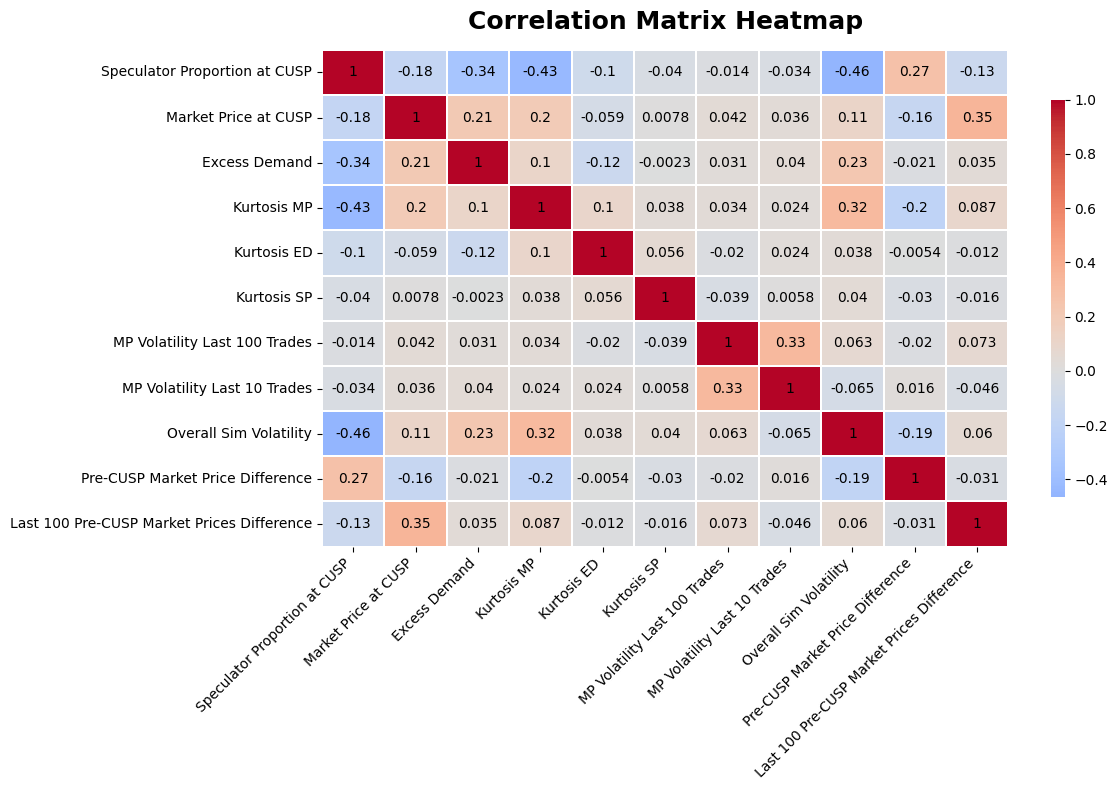

In [44]:
df_4 = df.copy()
df_4 = df[df['Catastrophe Point Found?'] == True]

corr_matrix_cols = [
    'Speculator Proportion at CUSP', 
    'Market Price at CUSP', 'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 
    'Kurtosis SP', 'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades', 
    'Overall Sim Volatility', 'Pre-CUSP Market Price Difference', 
    'Last 100 Pre-CUSP Market Prices Difference'
]
df_4 = df_4[corr_matrix_cols]
corr_matrix = df_4.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm',  # Change to 'coolwarm' for a diverging color map
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Adjust colour bar size
    annot_kws={"size": 10, "color": "black"},  # Ensure annotations are visible
)

plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


## FIGURE 35 - 2.3 CUSP Point Speculator Proportion Distribution

90.0% of the data exists within the speculator proportion range 6480.0% - 6520.0%


C:\Users\Ricky\AppData\Local\Temp\ipykernel_20068\1682406667.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_5_counts, x='Speculator Proportion at CUSP', y='Count', palette=bar_colors)


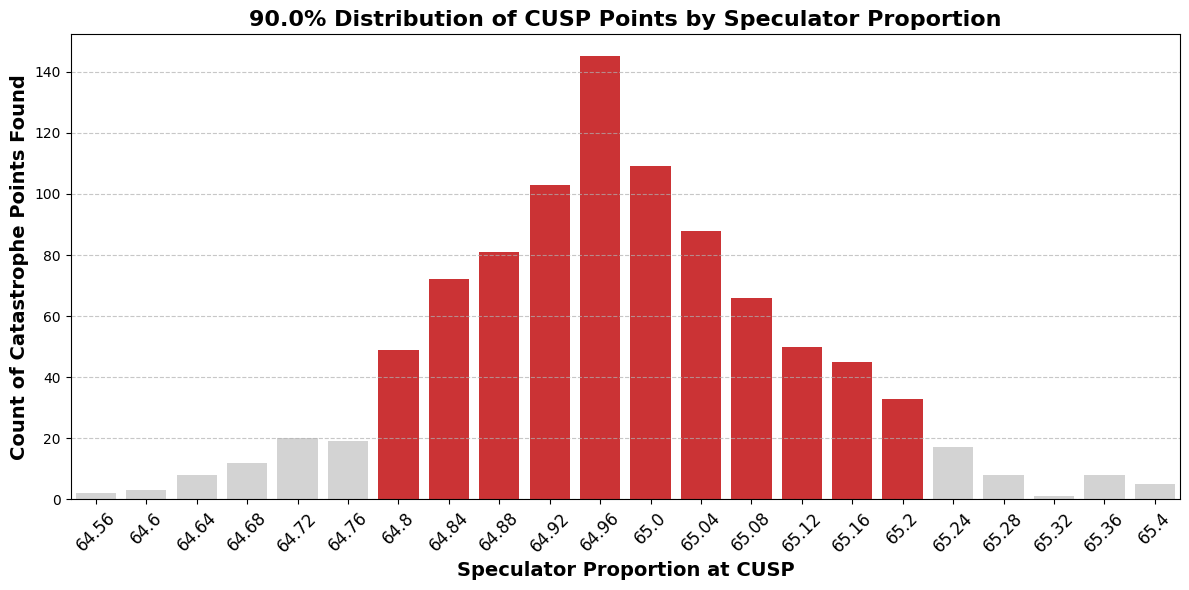

In [38]:
df_5 = df.copy()
df_5 = df_5[df_5['Catastrophe Point Found?'] == True]
df_5['Speculator Proportion at CUSP'] = df_5['Speculator Proportion at CUSP'].round(4)

df_5_counts = df_5['Speculator Proportion at CUSP'].value_counts().reset_index()
df_5_counts.columns = ['Speculator Proportion at CUSP', 'Count']
df_5_counts['Cumulative Count'] = df_5_counts['Count'].cumsum()
total_count = df_5_counts['Count'].sum()
df_5_counts['Cumulative Proportion'] = df_5_counts['Cumulative Count'] / total_count
threshold = 0.90

majority_data = df_5_counts[df_5_counts['Cumulative Proportion'] <= threshold]

if not majority_data.empty:
    lower_bound = majority_data['Speculator Proportion at CUSP'].min()
    upper_bound = majority_data['Speculator Proportion at CUSP'].max()
    print(f"{threshold*100}% of the data exists within the speculator proportion range {lower_bound*100}% - {upper_bound*100}%")
else:
    lower_bound, upper_bound = None, None

df_5_counts = df_5_counts.sort_values(by='Speculator Proportion at CUSP')

base_color = 'lightgrey'
highlight_color = '#E41A1C'
bar_colors = []

for x in df_5_counts['Speculator Proportion at CUSP']:
    if lower_bound is not None and upper_bound is not None:
        if lower_bound <= x <= upper_bound:
            bar_colors.append(highlight_color) 
        else:
            bar_colors.append(base_color)
    else:
        bar_colors.append(base_color)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_5_counts, x='Speculator Proportion at CUSP', y='Count', palette=bar_colors)

plt.title(f'{threshold*100}% Distribution of CUSP Points by Speculator Proportion', fontsize=16, weight='bold', color='black')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14, weight='bold', color='black')
plt.ylabel('Count of Catastrophe Points Found', fontsize=14, weight='bold', color='black')

plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

# FIGURE 36

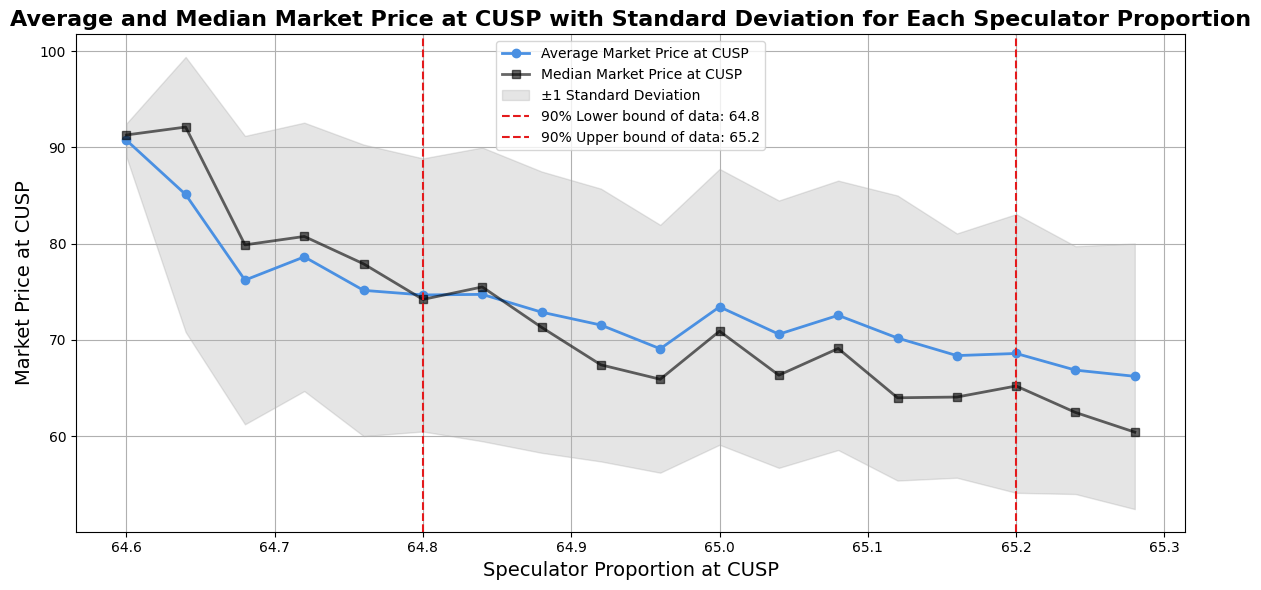

In [39]:
df_9 = df.copy()

# Group by 'Speculator Proportion at CUSP' and calculate mean, standard deviation, and median
df_market_price_stats = df_9.groupby('Speculator Proportion at CUSP').agg({
    'Market Price at CUSP': ['mean', 'std', 'median']
}).reset_index()

df_market_price_stats.columns = ['Speculator Proportion at CUSP', 
                                  'Average Market Price at CUSP', 
                                  'Standard Deviation', 
                                  'Median Market Price at CUSP']

# Optionally exclude the first and last rows if needed
df_market_price_stats = df_market_price_stats.iloc[1:-3]

# Set figure size
plt.figure(figsize=(12, 6))

# Plot average market price with aesthetic blue
plt.plot(df_market_price_stats['Speculator Proportion at CUSP'], 
         df_market_price_stats['Average Market Price at CUSP'], 
         marker='o', 
         linewidth=2, 
         color='#4A90E2',  # Blue colour
         label='Average Market Price at CUSP')

# Plot median market price in a softer black
plt.plot(df_market_price_stats['Speculator Proportion at CUSP'], 
         df_market_price_stats['Median Market Price at CUSP'], 
         marker='s', 
         linewidth=2, 
         color='black',  # Black for median line
         alpha=0.6,  # Less defined black
         label='Median Market Price at CUSP')

# Add standard deviation as shaded area
plt.fill_between(df_market_price_stats['Speculator Proportion at CUSP'], 
                 df_market_price_stats['Average Market Price at CUSP'] - df_market_price_stats['Standard Deviation'],
                 df_market_price_stats['Average Market Price at CUSP'] + df_market_price_stats['Standard Deviation'],
                 color='gray', alpha=0.2, label='±1 Standard Deviation')

# If lower and upper bounds exist, plot them
if 'lower_bound' in locals() and 'upper_bound' in locals():
    plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Lower bound of data: {lower_bound}')
    plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Upper bound of data: {upper_bound}')

# Set title and labels
plt.title('Average and Median Market Price at CUSP with Standard Deviation for Each Speculator Proportion', 
          fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('Market Price at CUSP', fontsize=14)

# Add grid, legend, and layout
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## FIGURE 37 - Average MP Price Difference at Each Speculator Proportion

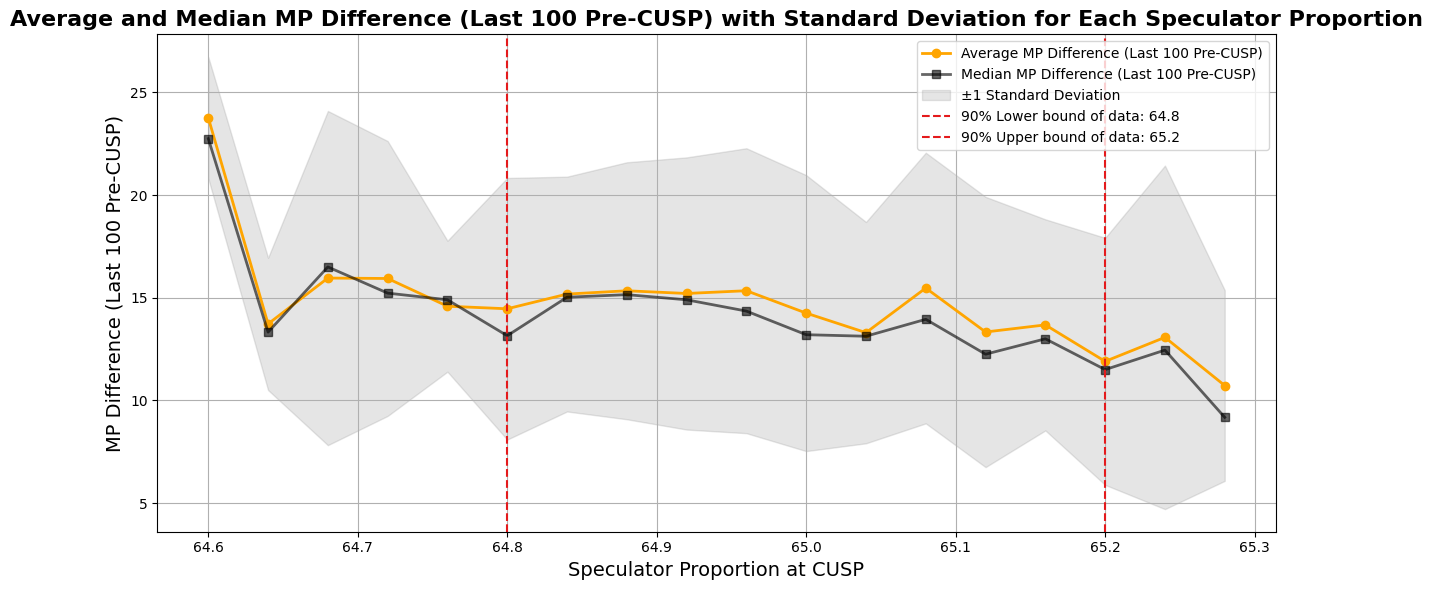

In [40]:
# Create a copy of the DataFrame
df_9 = df.copy()

# Group by 'Speculator Proportion at CUSP' and calculate statistics for 'Last 100 Pre-CUSP Market Prices Difference'
df_mp_diff_stats = df_9.groupby('Speculator Proportion at CUSP').agg({
    'Last 100 Pre-CUSP Market Prices Difference': ['mean', 'std', 'median']
}).reset_index()

# Rename columns for clarity
df_mp_diff_stats.columns = ['Speculator Proportion at CUSP', 
                            'Average MP Difference (Last 100 Pre-CUSP)', 
                            'Standard Deviation', 
                            'Median MP Difference (Last 100 Pre-CUSP)']

# Optionally exclude the first and last rows if needed
df_mp_diff_stats = df_mp_diff_stats.iloc[1:-3]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot average market price difference (using aesthetic orange)
plt.plot(df_mp_diff_stats['Speculator Proportion at CUSP'], 
         df_mp_diff_stats['Average MP Difference (Last 100 Pre-CUSP)'], 
         marker='o', 
         linewidth=2, 
         color='orange',  # Aesthetic orange colour
         label='Average MP Difference (Last 100 Pre-CUSP)')

# Plot median market price difference in a softer black
plt.plot(df_mp_diff_stats['Speculator Proportion at CUSP'], 
         df_mp_diff_stats['Median MP Difference (Last 100 Pre-CUSP)'], 
         marker='s', 
         linewidth=2, 
         color='black',  # Black for median line
         alpha=0.6,  # Less defined black
         label='Median MP Difference (Last 100 Pre-CUSP)')

# Add standard deviation as shaded area (grey fill)
plt.fill_between(df_mp_diff_stats['Speculator Proportion at CUSP'], 
                 df_mp_diff_stats['Average MP Difference (Last 100 Pre-CUSP)'] - df_mp_diff_stats['Standard Deviation'],
                 df_mp_diff_stats['Average MP Difference (Last 100 Pre-CUSP)'] + df_mp_diff_stats['Standard Deviation'],
                 color='gray', alpha=0.2, label='±1 Standard Deviation')

# If lower and upper bounds exist, plot them
if 'lower_bound' in locals() and 'upper_bound' in locals():
    plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Lower bound of data: {lower_bound}')
    plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
                label=f'90% Upper bound of data: {upper_bound}')

# Set title and labels
plt.title('Average and Median MP Difference (Last 100 Pre-CUSP) with Standard Deviation for Each Speculator Proportion', 
          fontsize=16, weight='bold')
plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
plt.ylabel('MP Difference (Last 100 Pre-CUSP)', fontsize=14)

# Add grid, legend, and layout adjustments
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# TABLE FORGOT WHICH ONE 

In [41]:
df_8 = df.copy()

# Group by 'Speculator Proportion at CUSP' and calculate mean, standard deviation, and median for the last 100 price differences
df_price_difference_stats = df_8.groupby('Speculator Proportion at CUSP').agg({
    'Last 100 Pre-CUSP Market Prices Difference': ['mean', 'std', 'median']    
}).reset_index()

# Flatten the column MultiIndex
df_price_difference_stats.columns = ['Speculator Proportion at CUSP', 'Average Price Difference', 'Standard Deviation', 'Median Price Difference']

# Display the resulting DataFrame
df_price_difference_stats = df_price_difference_stats.iloc[1:-1]
df_price_difference_stats
# # Plottingf
# plt.figure(figsize=(12, 6))

# # Plotting the average price difference for last 100 pre-CUSP market prices
# plt.plot(df_price_difference_stats['Speculator Proportion at CUSP'], 
#          df_price_difference_stats['Average Price Difference'], 
#          marker='o', 
#          label='Average Price Difference', 
#          linewidth=2)

# # Adding error bars to show standard deviation
# plt.fill_between(df_price_difference_stats['Speculator Proportion at CUSP'],
#                  df_price_difference_stats['Average Price Difference'] - df_price_difference_stats['Standard Deviation'],
#                  df_price_difference_stats['Average Price Difference'] + df_price_difference_stats['Standard Deviation'],
#                  color='gray', alpha=0.3, label='Standard Deviation')

# # Plotting the median price difference
# plt.plot(df_price_difference_stats['Speculator Proportion at CUSP'], 
#          df_price_difference_stats['Median Price Difference'], 
#          marker='x', 
#          linestyle='--', 
#          color='orange', 
#          label='Median Price Difference', 
#          linewidth=2)

# # Adding bounds if defined
# if 'lower_bound' in locals() and 'upper_bound' in locals():  
#     plt.axvline(x=lower_bound, color='#E41A1C', linestyle='--', 
#                 label=f'90% Lower bound of data: {lower_bound}')
#     plt.axvline(x=upper_bound, color='#E41A1C', linestyle='--', 
#                 label=f'90% Upper bound of data: {upper_bound}')

# # Setting titles and labels
# plt.title('Average MP Price Difference (Last 100 Pre-CUSP) at Each Speculator Proportion', fontsize=16, weight='bold')
# plt.xlabel('Speculator Proportion at CUSP', fontsize=14)
# plt.ylabel('Price Difference', fontsize=14)
# plt.grid()
# plt.legend(title='Price Difference Type')
# plt.tight_layout()
# plt.show()



,Speculator Proportion at CUSP,Average Price Difference,Standard Deviation,Median Price Difference
1,64.60,23.766667,2.959026,22.750
2,64.64,13.725000,3.219694,13.325
3,64.68,15.958333,8.136389,16.500
4,64.72,15.937500,6.693356,15.225
5,64.76,14.586842,3.188079,14.900
6,64.80,14.462245,6.369495,13.150
7,64.84,15.178472,5.716974,15.025
8,64.88,15.338889,6.256542,15.150
9,64.92,15.207767,6.626287,14.900
10,64.96,15.341724,6.937118,14.350
